# Data Description

**Gender** - Gender of the passengers (Female, Male)  
**Customer Type** - The customer type (Loyal customer, disloyal customer)  
**Age** - The actual age of the passengers  
**Type of Travel** - Purpose of the flight of the passengers (Personal Travel, Business Travel)  
**Class** - Travel class in the plane of the passengers (Business, Eco, Eco Plus)  
**Flight distance** - The flight distance of this journey  

**Inflight wifi service** - satisfaction level with Wi-Fi service on board (0: not rated; 1-5)  
**Departure/Arrival time convenient** - departure/arrival time satisfaction level (0: not rated; 1-5)  
**Ease of Online booking** - online booking satisfaction rate (0: not rated; 1-5)  
**Gate location** - level of satisfaction with the gate location (0: not rated; 1-5)  
**Food and drink** - food and drink satisfaction level (0: not rated; 1-5)  
**Online boarding** - satisfaction level with online boarding (0: not rated; 1-5)  
**Seat comfort** - seat satisfaction level (0: not rated; 1-5)  
**Inflight entertainment** - satisfaction with inflight entertainment (0: not rated; 1-5)  
**On-board service** - level of satisfaction with on-board service (0: not rated; 1-5)  
**Leg room service** - level of satisfaction with leg room service (0: not rated; 1-5)  
**Baggage handling** - level of satisfaction with baggage handling (0: not rated; 1-5)  
**Checkin service** - level of satisfaction with checkin service (0: not rated; 1-5)  
**Inflight service** - level of satisfaction with inflight service (0: not rated; 1-5)  
**Cleanliness** - level of satisfaction with cleanliness (0: not rated; 1-5)

**Departure Delay in Minutes** - Minutes delayed when departure  
**Arrival Delay in Minutes** - Minutes delayed when Arrival  
**Satisfaction** - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
zero_counts = (data == 0).sum()
print(zero_counts)

Unnamed: 0                               1
id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3103
Departure/Arrival time convenient     5300
Ease of Online booking                4487
Gate location                            1
Food and drink                         107
Online boarding                       2428
Seat comfort                             1
Inflight entertainment                  14
On-board service                         3
Leg room service                       472
Baggage handling                         0
Checkin service                          1
Inflight service                         3
Cleanliness                             12
Departure Delay in Minutes           58668
Arrival Del

In [8]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)
data = data.dropna(subset=['Arrival Delay in Minutes'])
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].astype(int)

In [9]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Passenger Basic Information

In [10]:
sns.set_palette("pastel")
sns.set_style("whitegrid")

In [11]:
data['Gender'].value_counts()

Gender
Female    52576
Male      51018
Name: count, dtype: int64

In [12]:
data['Customer Type'].value_counts()

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

In [13]:
data['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [14]:
data['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

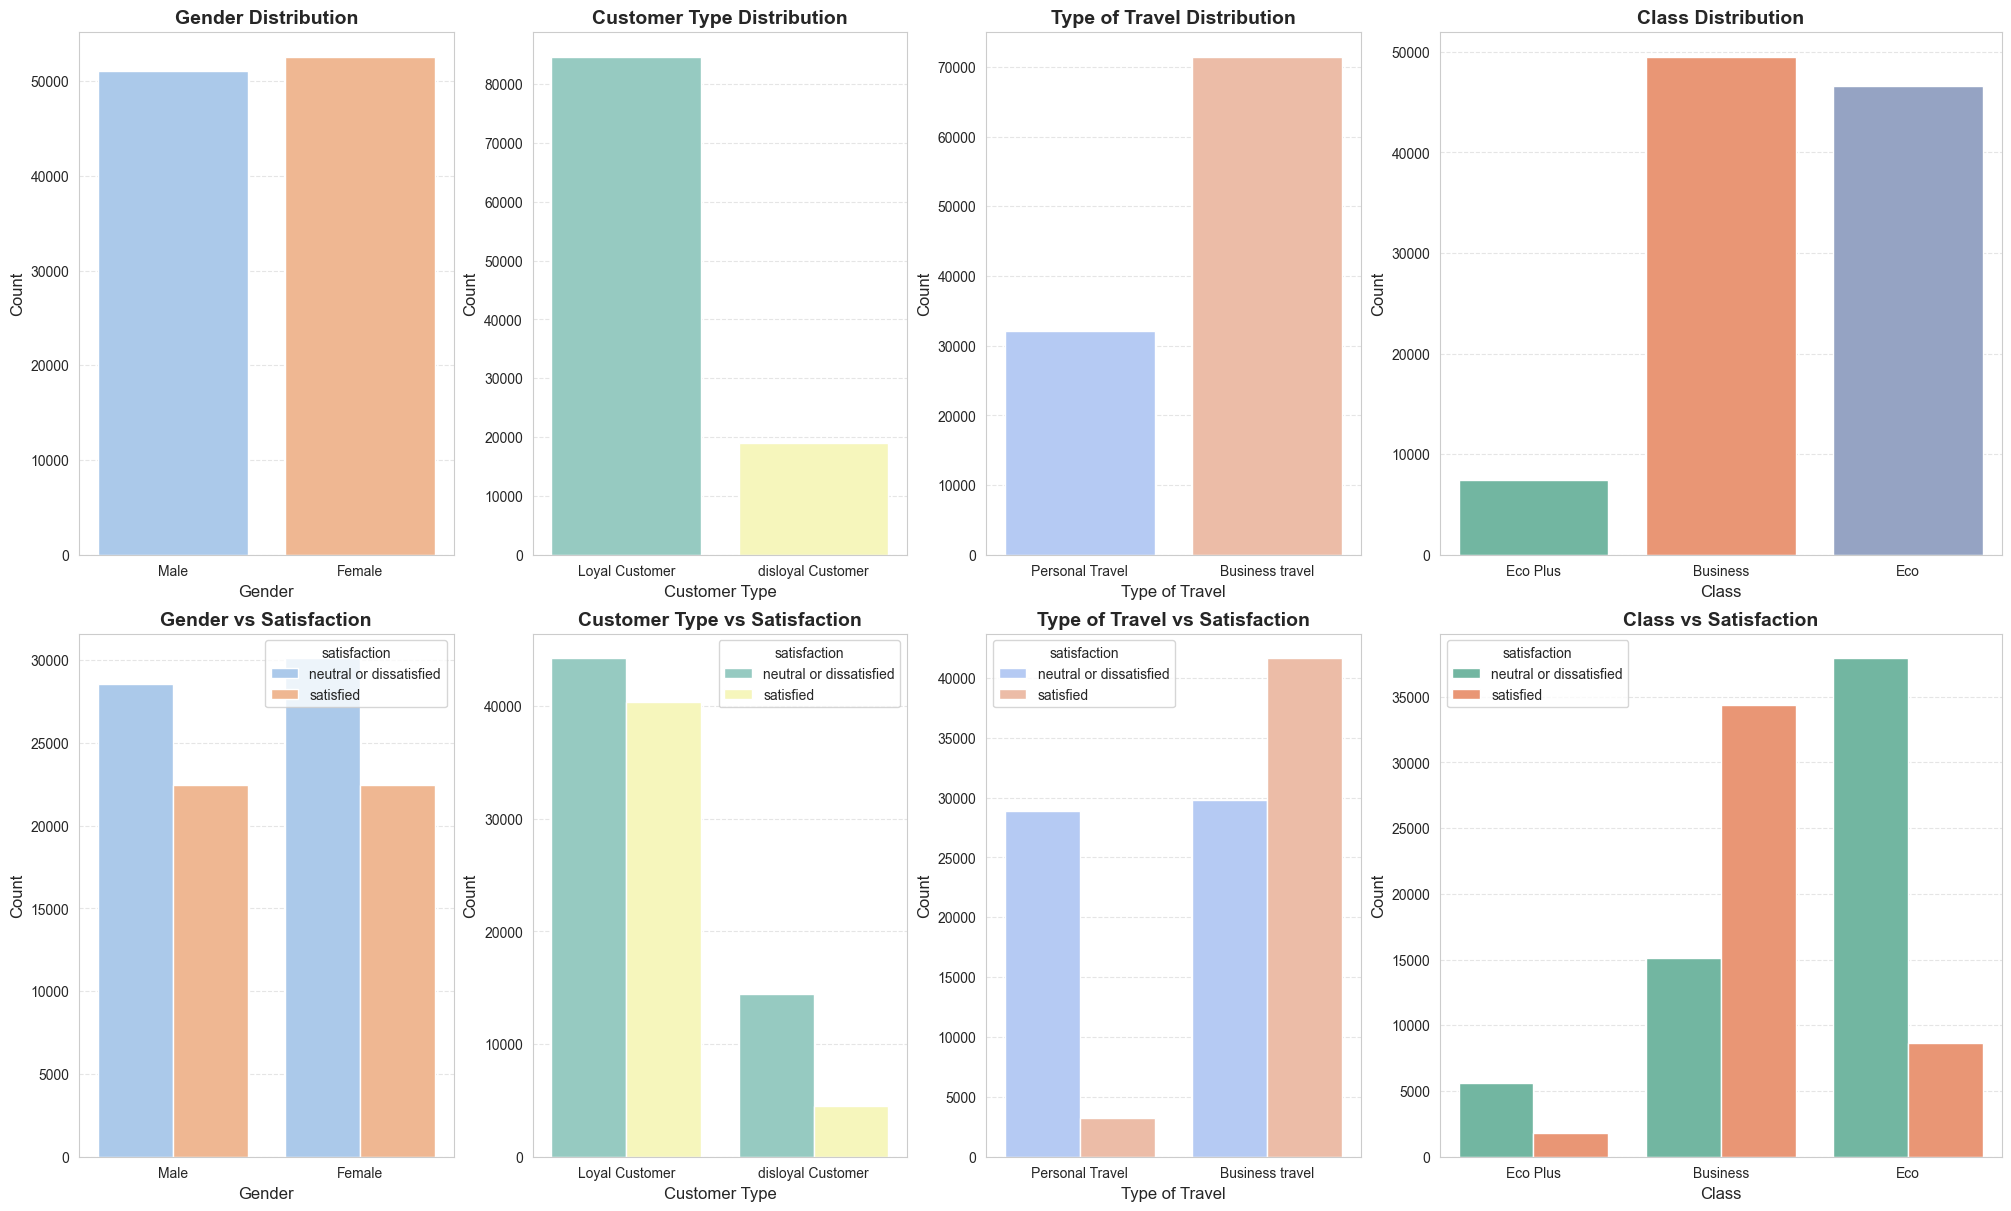

In [15]:
fig = plt.figure(figsize=(20, 12), constrained_layout=True)
spec = gridspec.GridSpec(2, 4, figure=fig, width_ratios=[1, 1, 1, 1.5])

features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
palettes = ["pastel", "Set3", "coolwarm", "Set2"]

axes_row1 = [fig.add_subplot(spec[0, i]) for i in range(4)]
for ax, feature, palette in zip(axes_row1, features, palettes):
    sns.countplot(data=data, x=feature, hue=feature, ax=ax, palette=palette)
    ax.set_title(f"{feature} Distribution", fontsize=14, weight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axes_row2 = [fig.add_subplot(spec[1, i]) for i in range(4)]
for ax, feature, palette in zip(axes_row2, features, palettes):
    sns.countplot(data=data, x=feature, hue='satisfaction', ax=ax, palette=palette)
    ax.set_title(f"{feature} vs Satisfaction", fontsize=14, weight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Gender:** Male and female customers are evenly distributed; satisfaction is slightly higher among females.  
**Customer Type:** Loyal customers dominate and are more satisfied than disloyal ones.  
**Travel Type:** Business travelers greatly outnumber personal travelers and show higher satisfaction.  
**Class:** Business class has the highest satisfaction, while Eco Plus performs the worst.

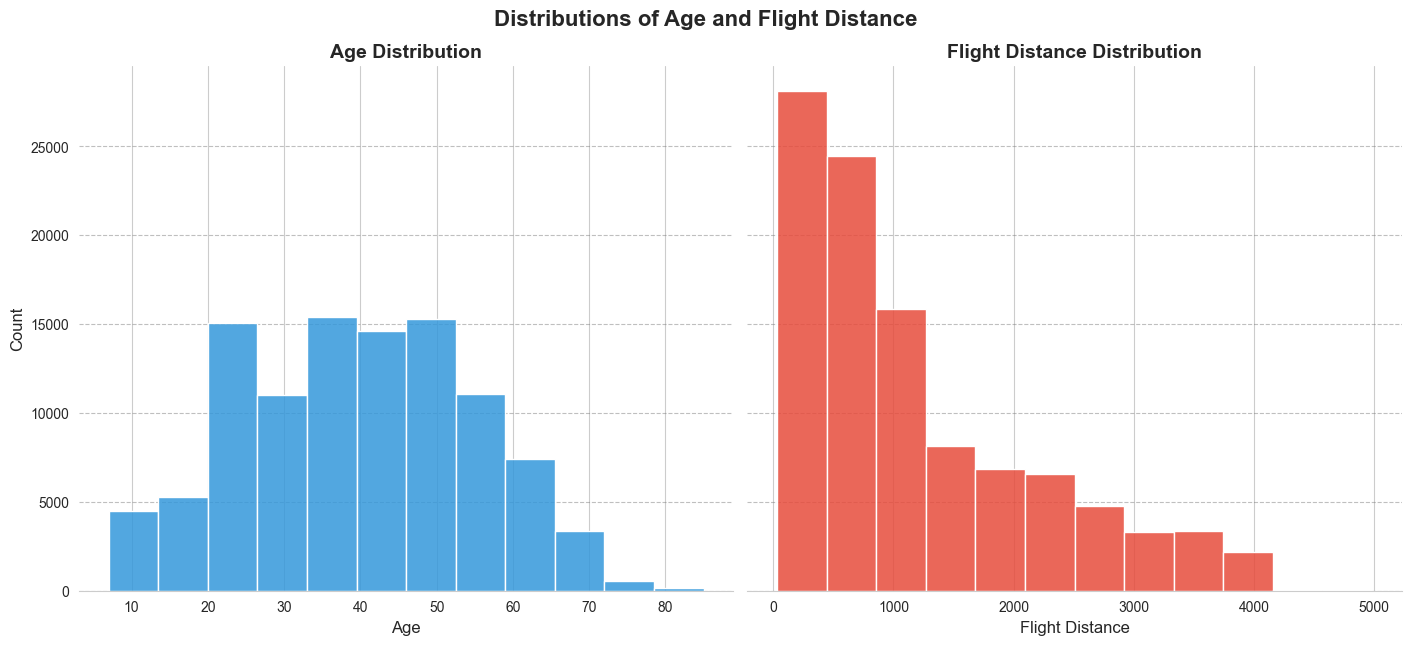

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True, sharey=True)

histplot_params = {
    'bins': 12,
    'alpha': 0.85,
    'kde': False,
}

# Age
sns.histplot(
    data=data,
    x='Age',
    color='#3498db',
    ax=ax[0],
    **histplot_params
)
ax[0].set_title("Age Distribution", fontsize=14, weight='bold')
ax[0].set_xlabel("Age", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.5, color='gray')

# Flight Distance
sns.histplot(
    data=data,
    x='Flight Distance',
    color='#e74c3c',
    ax=ax[1],
    **histplot_params
)
ax[1].set_title("Flight Distance Distribution", fontsize=14, weight='bold')
ax[1].set_xlabel("Flight Distance", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.5, color='gray')

fig.suptitle("Distributions of Age and Flight Distance", fontsize=16, weight='bold', y=1.05)
sns.despine(left=True, bottom=False)
plt.show()

**Age:** Most passengers are aged 20–50, peaking at 30–40.  
**Flight Distance:** Short-haul flights (<1000 units) dominate.

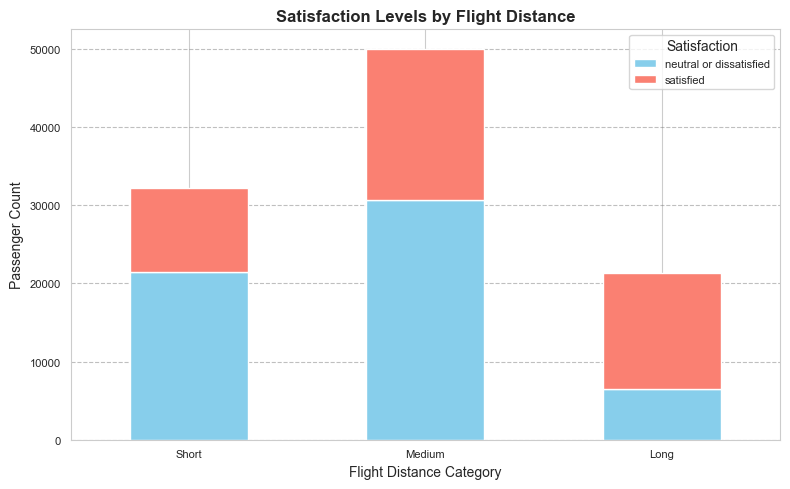

In [17]:
data['Flight Distance Category'] = pd.cut(
    data['Flight Distance'], 
    bins=[0, 500, 2000, float('inf')], 
    labels=['Short', 'Medium', 'Long']
)

flight_satisfaction = data.groupby(['Flight Distance Category', 'satisfaction']).size().unstack().fillna(0)

colors = ['#87CEEB', '#FA8072']
flight_satisfaction.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 5), 
    color=colors, 
)

plt.title('Satisfaction Levels by Flight Distance', fontsize=12, weight='bold')
plt.xlabel('Flight Distance Category', fontsize=10)
plt.ylabel('Passenger Count', fontsize=10)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Satisfaction', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')
plt.tight_layout()
plt.show()

**Short Flights:** Higher proportion of neutral or dissatisfied passengers compared to satisfied ones.  
**Medium Flights:** Largest passenger group, with a balanced satisfaction distribution.  
**Long Flights:** Fewer passengers but a higher proportion of satisfied customers.

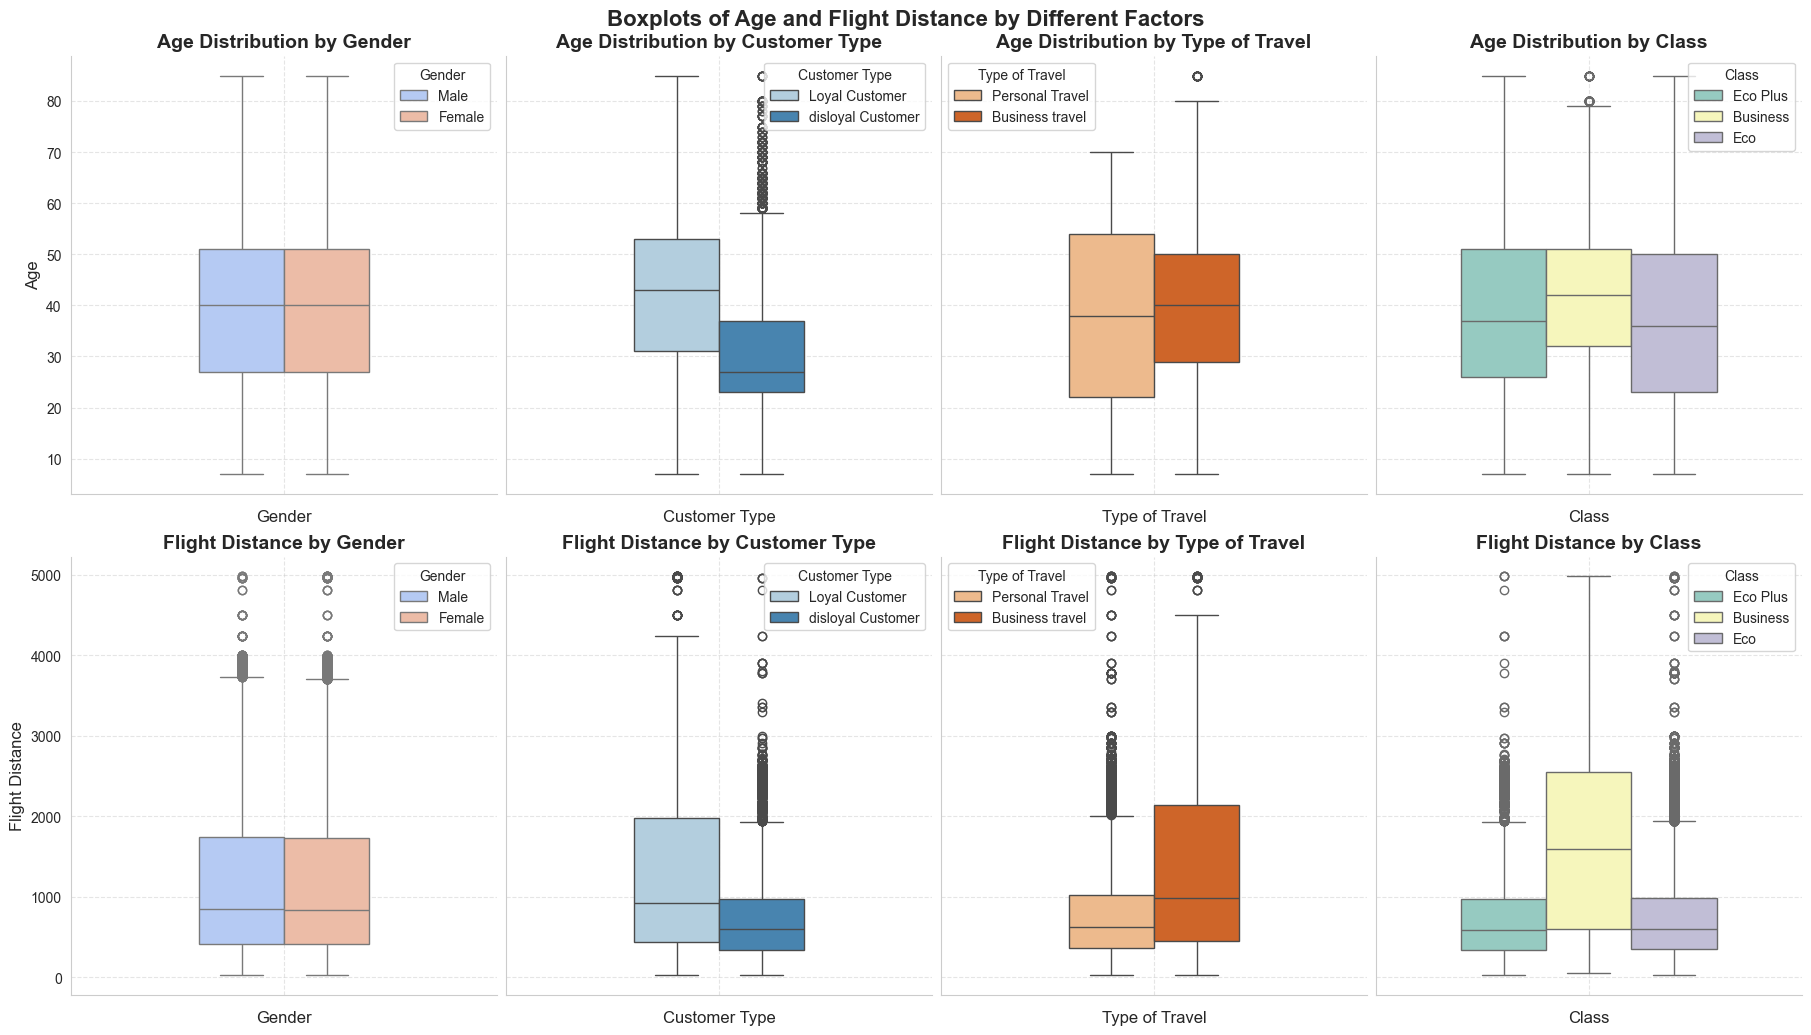

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 10), constrained_layout=True, sharey='row')
ax = ax.flatten()

# Age
sns.boxplot(hue='Gender', y='Age', data=data, ax=ax[0], palette='coolwarm', width=0.4)
ax[0].set_title("Age Distribution by Gender", fontsize=14, weight='bold')
ax[0].set_xlabel("Gender", fontsize=12)
ax[0].set_ylabel("Age", fontsize=12)
ax[0].grid(visible=True, linestyle='--', alpha=0.5)

sns.boxplot(hue='Customer Type', y='Age', data=data, ax=ax[1], palette='Blues', width=0.4)
ax[1].set_title("Age Distribution by Customer Type", fontsize=14, weight='bold')
ax[1].set_xlabel("Customer Type", fontsize=12)
ax[1].set_ylabel("Age", fontsize=12)
ax[1].grid(visible=True, linestyle='--', alpha=0.5)

sns.boxplot(hue='Type of Travel', y='Age', data=data, ax=ax[2], palette='Oranges', width=0.4)
ax[2].set_title("Age Distribution by Type of Travel", fontsize=14, weight='bold')
ax[2].set_xlabel("Type of Travel", fontsize=12)
ax[2].set_ylabel("Age", fontsize=12)
ax[2].grid(visible=True, linestyle='--', alpha=0.5)

sns.boxplot(hue='Class', y='Age', data=data, ax=ax[3], palette='Set3', width=0.6)
ax[3].set_title("Age Distribution by Class", fontsize=14, weight='bold')
ax[3].set_xlabel("Class", fontsize=12)
ax[3].set_ylabel("Age", fontsize=12)
ax[3].grid(visible=True, linestyle='--', alpha=0.5)

# Flight Distance
sns.boxplot(hue='Gender', y='Flight Distance', data=data, ax=ax[4], palette='coolwarm', width=0.4)
ax[4].set_title("Flight Distance by Gender", fontsize=14, weight='bold')
ax[4].set_xlabel("Gender", fontsize=12)
ax[4].set_ylabel("Flight Distance", fontsize=12)
ax[4].grid(visible=True, linestyle='--', alpha=0.5)

sns.boxplot(hue='Customer Type', y='Flight Distance', data=data, ax=ax[5], palette='Blues', width=0.4)
ax[5].set_title("Flight Distance by Customer Type", fontsize=14, weight='bold')
ax[5].set_xlabel("Customer Type", fontsize=12)
ax[5].set_ylabel("Flight Distance", fontsize=12)
ax[5].grid(visible=True, linestyle='--', alpha=0.5)

sns.boxplot(hue='Type of Travel', y='Flight Distance', data=data, ax=ax[6], palette='Oranges', width=0.4)
ax[6].set_title("Flight Distance by Type of Travel", fontsize=14, weight='bold')
ax[6].set_xlabel("Type of Travel", fontsize=12)
ax[6].set_ylabel("Flight Distance", fontsize=12)
ax[6].grid(visible=True, linestyle='--', alpha=0.5)

sns.boxplot(hue='Class', y='Flight Distance', data=data, ax=ax[7], palette='Set3', width=0.6)
ax[7].set_title("Flight Distance by Class", fontsize=14, weight='bold')
ax[7].set_xlabel("Class", fontsize=12)
ax[7].set_ylabel("Flight Distance", fontsize=12)
ax[7].grid(visible=True, linestyle='--', alpha=0.5)

fig.suptitle("Boxplots of Age and Flight Distance by Different Factors", fontsize=16, weight='bold', y=1.02)

sns.despine()

plt.show()

**Age:**  
Loyal and Business class travelers are older.  
Economy and disloyal customers are younger.  

**Flight Distance:**  
Loyal and Business travelers fly longer.  
Economy and personal travelers prefer shorter flights.

## Satisfaction Level

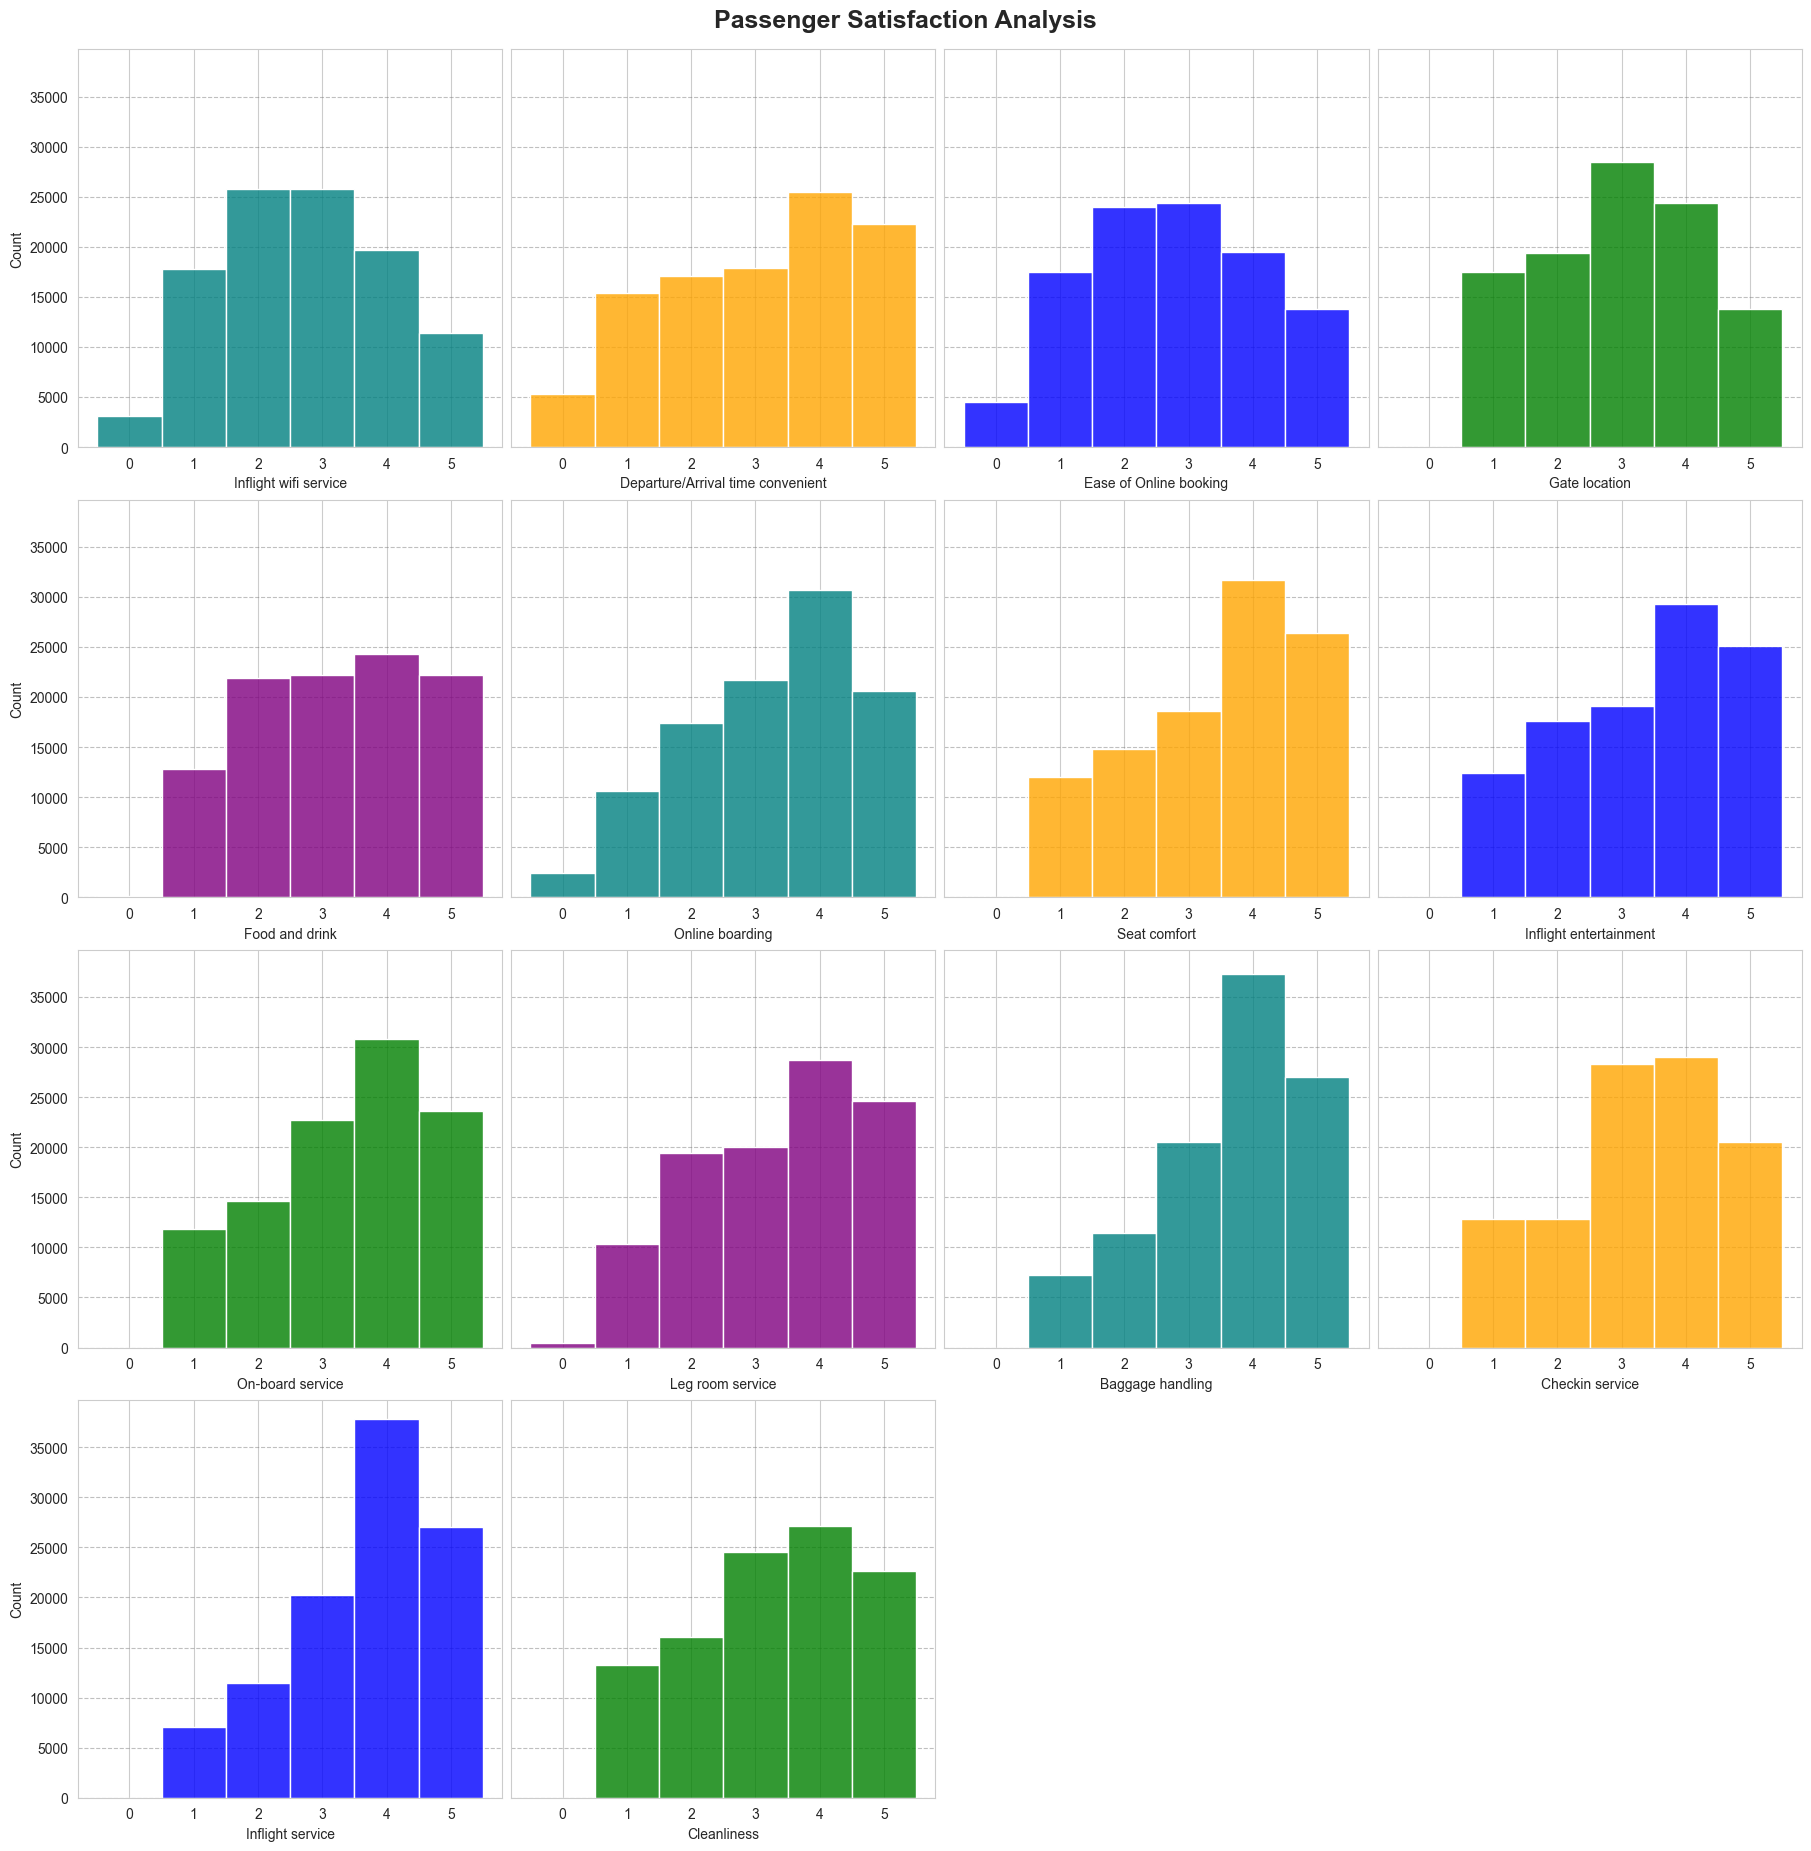

In [19]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 18), constrained_layout=True, sharey=True)
ax = ax.flatten()

colors = ['teal', 'orange', 'blue', 'green', 'purple']

columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service', 'Cleanliness'
]

for i, column in enumerate(columns):
    sns.histplot(x=column, data=data, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
                 color=colors[i % len(colors)], alpha=0.8, ax=ax[i])
    ax[i].grid(axis='y', linestyle='--', color='grey', alpha=0.5)

plt.delaxes(ax[14])
plt.delaxes(ax[15])

fig.suptitle("Passenger Satisfaction Analysis", fontsize=18, weight='bold', y=1.02)
fig.align_labels()
plt.show()

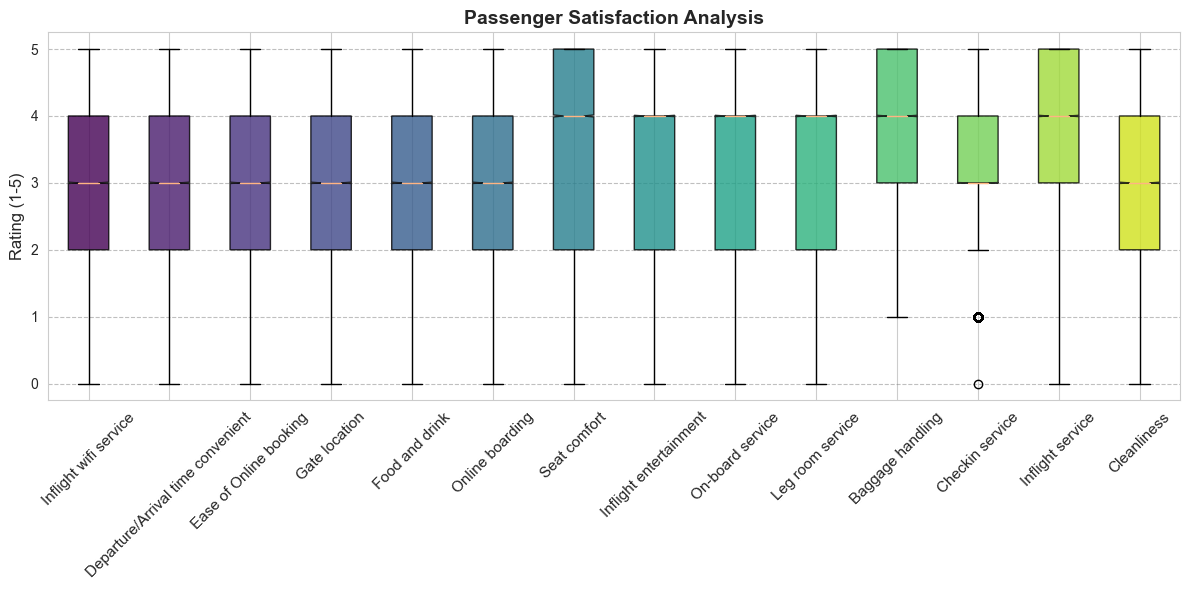

In [20]:
data_s = [
    data['Inflight wifi service'],
    data['Departure/Arrival time convenient'],
    data['Ease of Online booking'],
    data['Gate location'],
    data['Food and drink'],
    data['Online boarding'],
    data['Seat comfort'],
    data['Inflight entertainment'],
    data['On-board service'],
    data['Leg room service'],
    data['Baggage handling'],
    data['Checkin service'],
    data['Inflight service'],
    data['Cleanliness']
]

fig, ax = plt.subplots(figsize=(12, 6))
box = ax.boxplot(data_s, patch_artist=True, notch=True)

colors = [to_hex(viridis(i / len(data_s))) for i in range(len(data_s))]

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8) 
    
ax.set_xticklabels([
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
], rotation=45, fontsize=11)

ax.set_title("Passenger Satisfaction Analysis", fontsize=14, weight='bold')
ax.set_ylabel("Rating (1-5)", fontsize=12)
ax.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.tight_layout()
plt.show()

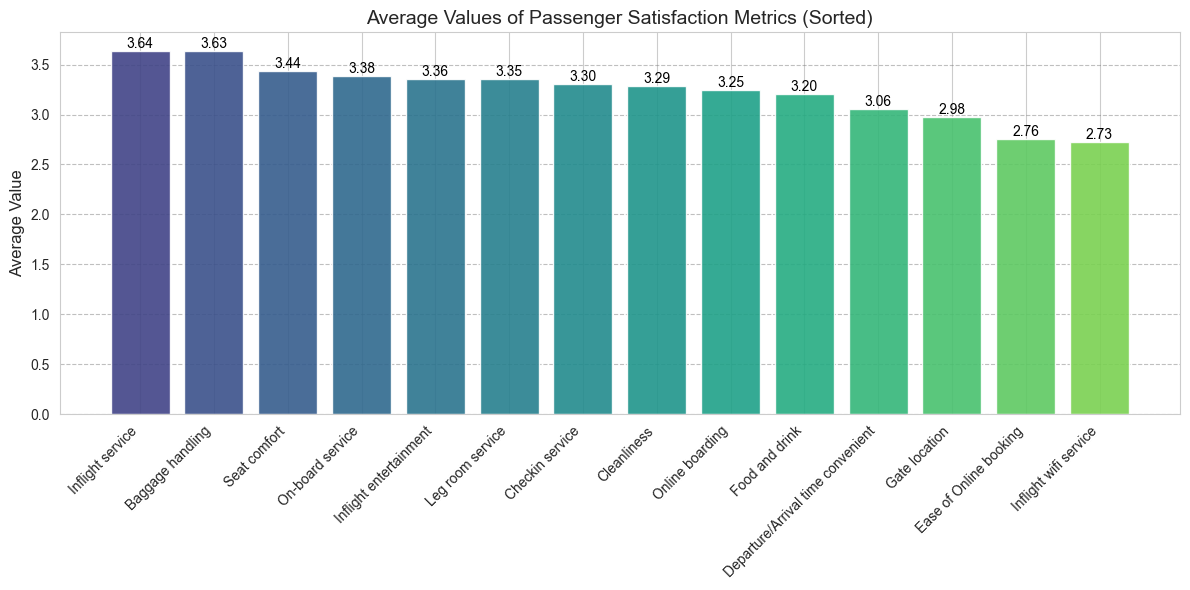

In [21]:
average_values = [col.mean() for col in data_s]

columns = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

sorted_indices = np.argsort(average_values)[::-1]
sorted_columns = [columns[i] for i in sorted_indices]
sorted_values = [average_values[i] for i in sorted_indices]

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(columns)))
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_columns, sorted_values, color=colors, alpha=0.9)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f"{yval:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Average Value", fontsize=12)
plt.title("Average Values of Passenger Satisfaction Metrics (Sorted)", fontsize=14)
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
plt.tight_layout()
plt.show()

**Top Ratings:** Inflight service, baggage handling, and seat comfort score the highest.  
**Lowest Ratings:** Gate location, online booking, and inflight WiFi need improvement.

## Flight Status

In [22]:
data['Departure Delay Status'] = data['Departure Delay in Minutes'].apply(lambda x: 'On Time' if x <= 0 else 'Delayed')
data['Arrival Delay Status'] = data['Arrival Delay in Minutes'].apply(lambda x: 'On Time' if x <= 0 else 'Delayed')

departure_status = data['Departure Delay Status'].value_counts().reset_index()
departure_status.columns = ['Status', 'Count']

arrival_status = data['Arrival Delay Status'].value_counts().reset_index()
arrival_status.columns = ['Status', 'Count']

satisfaction_status = data['satisfaction'].value_counts().reset_index()
satisfaction_status.columns = ['Satisfaction Level', 'Count']

departure_satisfaction = data.groupby(['Departure Delay Status', 'satisfaction']).size().reset_index(name='Count')
arrival_satisfaction = data.groupby(['Arrival Delay Status', 'satisfaction']).size().reset_index(name='Count')

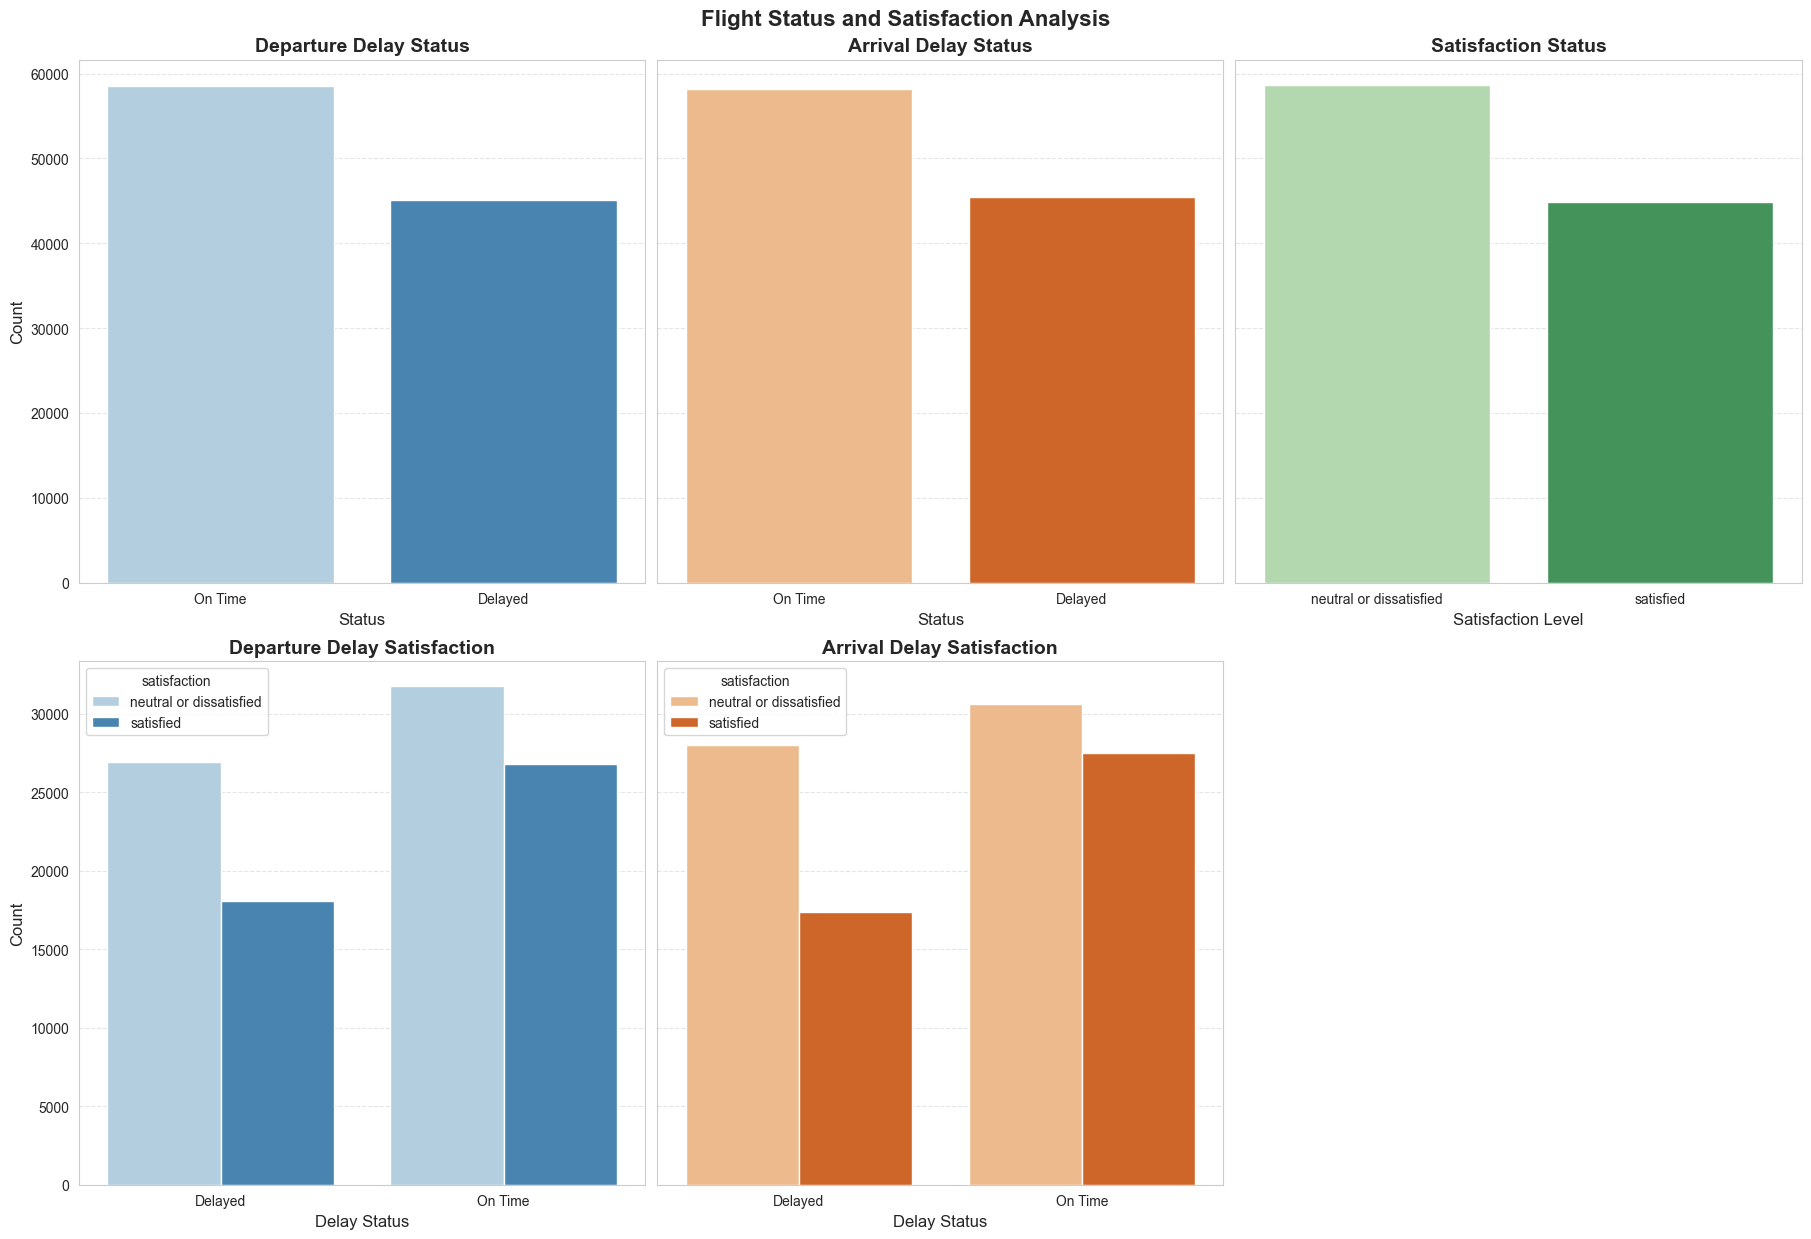

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True, sharey='row')

# Departure Delay Status
sns.barplot(
    data=departure_status,
    x='Status',
    y='Count',
    hue='Status',
    palette="Blues",
    dodge=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Departure Delay Status", fontsize=14, weight='bold')
axes[0, 0].set_xlabel("Status", fontsize=12)
axes[0, 0].set_ylabel("Count", fontsize=12)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Arrival Delay Status
sns.barplot(
    data=arrival_status,
    x='Status',
    y='Count',
    hue='Status',
    palette="Oranges",
    dodge=False,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Arrival Delay Status", fontsize=14, weight='bold')
axes[0, 1].set_xlabel("Status", fontsize=12)
axes[0, 1].set_ylabel("Count", fontsize=12)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Satisfaction Status
sns.barplot(
    data=satisfaction_status,
    x='Satisfaction Level',
    y='Count',
    hue='Satisfaction Level',
    palette="Greens",
    dodge=False,
    ax=axes[0, 2]
)
axes[0, 2].set_title("Satisfaction Status", fontsize=14, weight='bold')
axes[0, 2].set_xlabel("Satisfaction Level", fontsize=12)
axes[0, 2].set_ylabel("Count", fontsize=12)
axes[0, 2].grid(axis='y', linestyle='--', alpha=0.5)

# Departure Delay Satisfaction
sns.barplot(
    data=departure_satisfaction,
    x='Departure Delay Status',
    y='Count',
    hue='satisfaction',
    palette="Blues",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Departure Delay Satisfaction", fontsize=14, weight='bold')
axes[1, 0].set_xlabel("Delay Status", fontsize=12)
axes[1, 0].set_ylabel("Count", fontsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Arrival Delay Satisfaction
sns.barplot(
    data=arrival_satisfaction,
    x='Arrival Delay Status',
    y='Count',
    hue='satisfaction',
    palette="Oranges",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Arrival Delay Satisfaction", fontsize=14, weight='bold')
axes[1, 1].set_xlabel("Delay Status", fontsize=12)
axes[1, 1].set_ylabel("Count", fontsize=12)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

plt.delaxes(axes[1, 2])

fig.suptitle("Flight Status and Satisfaction Analysis", fontsize=16, weight='bold', y=1.02)

plt.show()

Passengers are more satisfied with on-time flights compared to delayed ones.

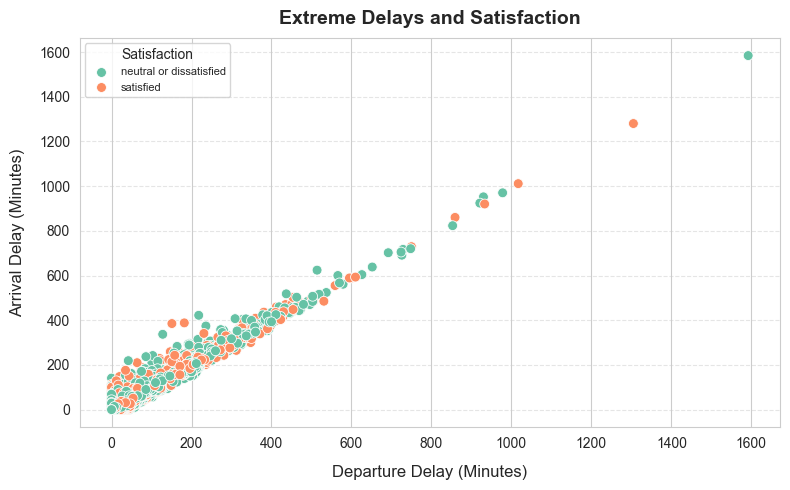

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data, 
    x='Departure Delay in Minutes', 
    y='Arrival Delay in Minutes', 
    hue='satisfaction', 
    palette='Set2', 
    s=50
)

plt.title('Extreme Delays and Satisfaction', fontsize=14, weight='bold', pad=10)
plt.xlabel('Departure Delay (Minutes)', fontsize=12, labelpad=10)
plt.ylabel('Arrival Delay (Minutes)', fontsize=12, labelpad=10)

plt.legend(
    title='Satisfaction', 
    title_fontsize=10, 
    fontsize=8, 
    loc='upper left',
    frameon=True,
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

1. Both satisfied and dissatisfied passengers are distributed across delays, but extreme delays (e.g., >600 minutes) mostly involve dissatisfied passengers.  
2. Most delays, especially longer ones, are associated with dissatisfaction.  
3. There is a strong positive correlation between departure and arrival delay, indicating that longer departure delays tend to lead to longer arrival delays.

In [25]:
satisfaction_mapping = {'satisfied': 1, 'neutral or dissatisfied': 0}
data['satisfaction'] = data['satisfaction'].map(satisfaction_mapping)

In [26]:
numeric_data = data.select_dtypes(include='number')
correlation = numeric_data.corr()
correlation['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503447
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Ease of Online booking               0.171507
Age                                  0.137040
Gate location                        0.000449
Departure Delay in Minutes          -0.050515
Departure/Arrival time convenient   -0.051718
Arrival Delay in Minutes            -0.057582
Name: satisfaction, dtype: float64

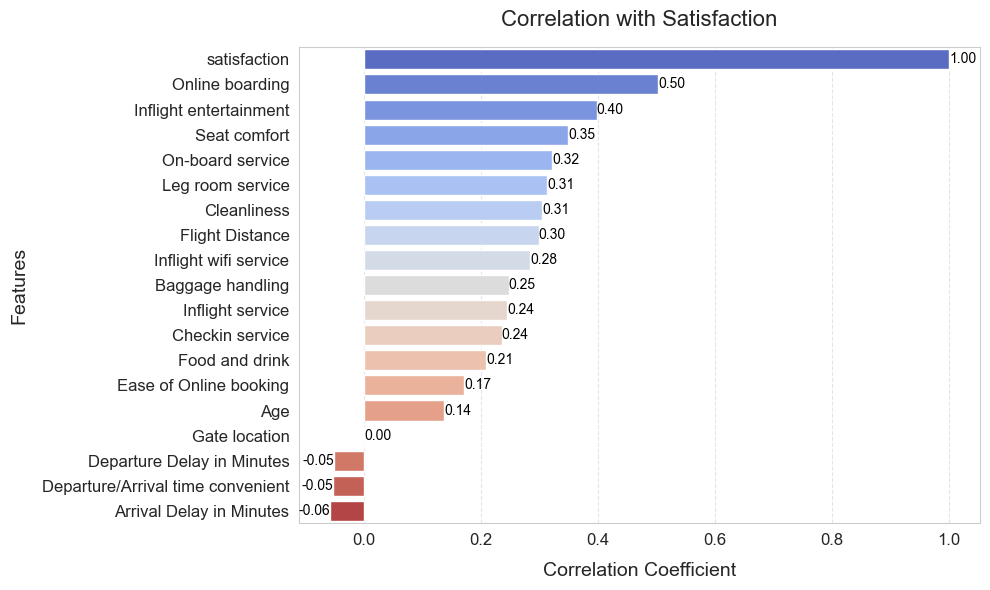

In [27]:
plt.figure(figsize=(10, 6))

correlation_sorted = correlation['satisfaction'].sort_values(ascending=False).reset_index()
correlation_sorted.columns = ['Feature', 'Correlation']

sns.barplot(
    data=correlation_sorted,
    y='Feature',
    x='Correlation',
    palette='coolwarm',
    hue='Feature',
    dodge=False
)

plt.legend([], [], frameon=False)

plt.title('Correlation with Satisfaction', fontsize=16, pad=15)
plt.xlabel('Correlation Coefficient', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)

for index, row in correlation_sorted.iterrows():
    plt.text(
        x=row['Correlation'], 
        y=index, 
        s=f"{row['Correlation']:.2f}", 
        va='center', 
        ha='left' if row['Correlation'] > 0 else 'right', 
        fontsize=10, 
        color='black'
    )

plt.tight_layout()
plt.show()

**Top Drivers:** Online boarding, inflight entertainment, and seat comfort.  
**Weak/Negative:** Delays and time convenience hurt satisfaction.

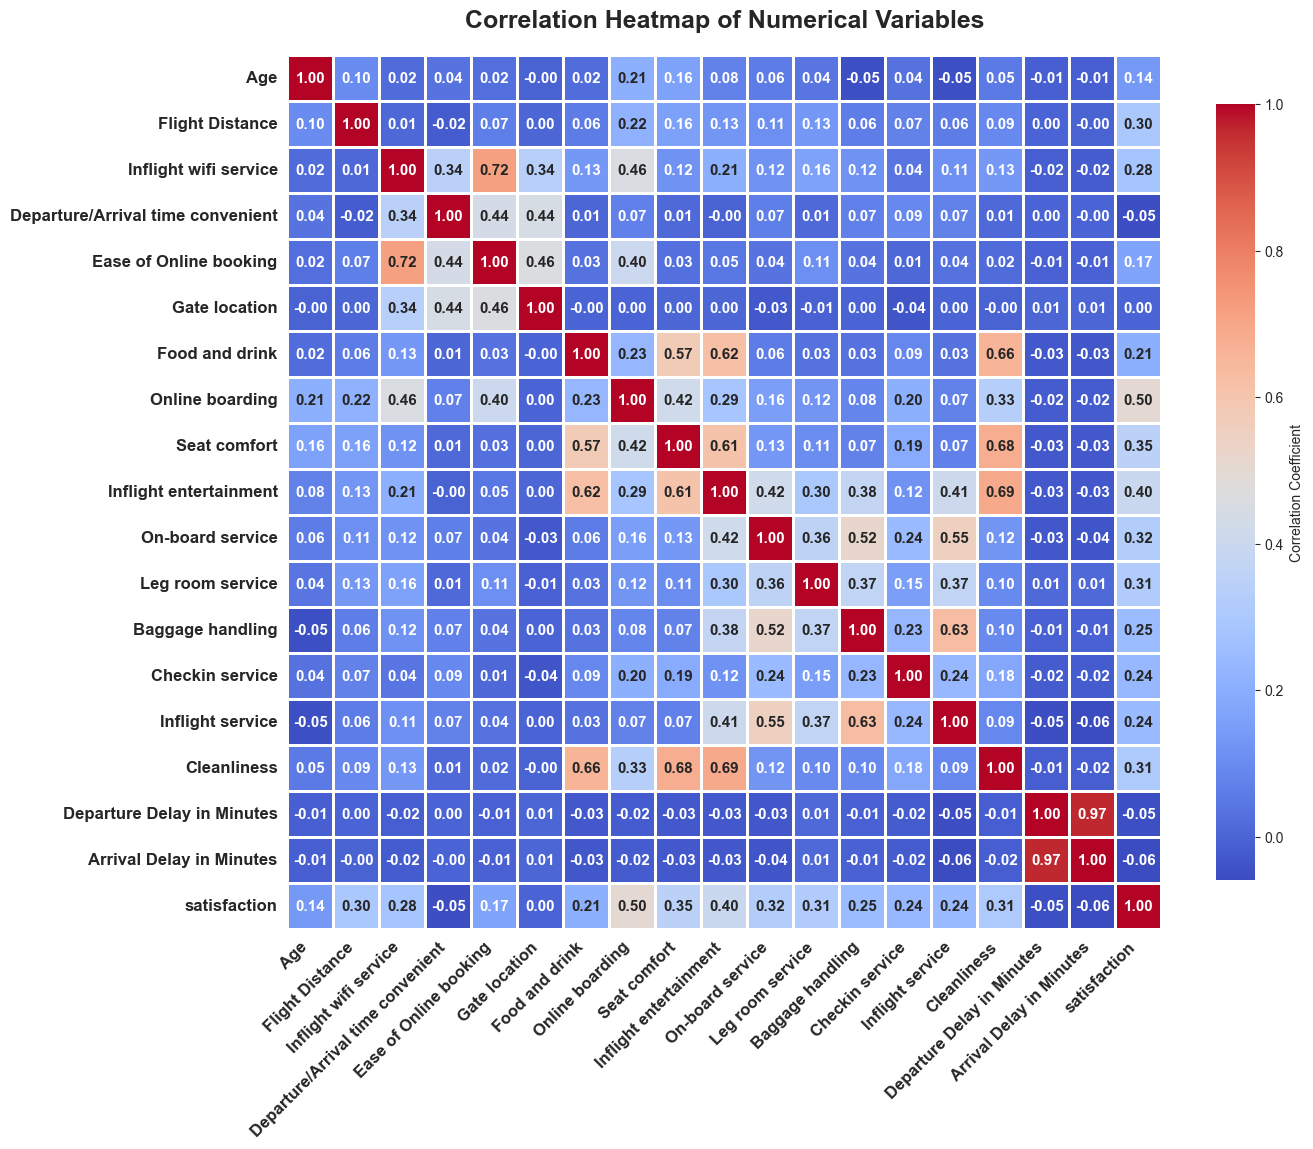

In [28]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", #"coolwarm"， "viridis"， "cividis"， "RdBu_r"， "Spectral"
    square=True, 
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    linewidths=0.8, 
    annot_kws={"fontsize": 11, "fontweight": "bold"}
)

plt.title(
    "Correlation Heatmap of Numerical Variables", 
    fontsize=18, 
    fontweight='bold', 
    pad=20,
    loc='center'
)
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontsize=12, rotation=0, fontweight='bold')

plt.tight_layout()
plt.show()

**Strong Positive Correlations:**  
Satisfaction correlates highly with online boarding (0.50), inflight entertainment (0.40), and seat comfort (0.35).  
**Weak or Negative Correlations:**  
Delays (arrival/departure) and departure/arrival time convenience show weak negative correlations with satisfaction.  
**Inter-variable Relations:**  
Ease of online booking and inflight WiFi service (0.72) are strongly related but less directly impactful on satisfaction.

In [29]:
features = data[['Flight Distance', 'Age', 'satisfaction']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means
kmeans = KMeans(n_clusters=4, random_state=123, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_scaled)

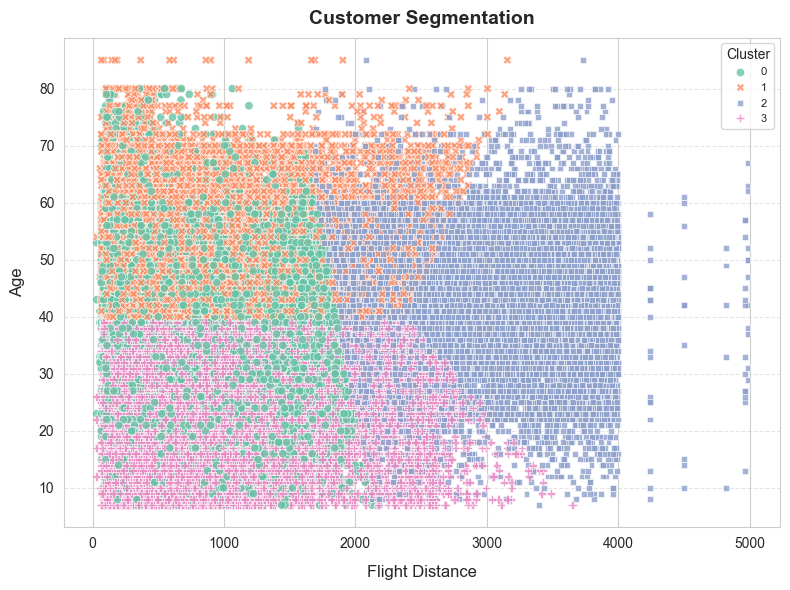

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data, 
    x='Flight Distance', 
    y='Age', 
    hue='Cluster', 
    palette='Set2', 
    style='Cluster',
    alpha=0.8
)

plt.title('Customer Segmentation', fontsize=14, weight='bold', pad=10)
plt.xlabel('Flight Distance', fontsize=12, labelpad=10)
plt.ylabel('Age', fontsize=12, labelpad=10)

plt.legend(
    title='Cluster', 
    title_fontsize=10, 
    fontsize=8, 
    loc='upper right',
    frameon=True,
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()